### BINARY LOGISTIC REGRESSION FROM SCRATCH AND FROM SCIKIT LEARN

In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

###### LOADING DATASET

In [241]:
marks_df=pd.read_csv("marks.csv")
marks_df.head()

,mark1,mark2,target
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


###### SPLITTING DATA BETWEEN X & Y, Making List of Admitted and Non-Admitted Students

In [242]:
x=marks_df.iloc[:,:-1]
y=marks_df.iloc[:,-1]
admitted=marks_df[y==1]
not_admitted=marks_df[y==0]

###### VISUALISING THE DATA

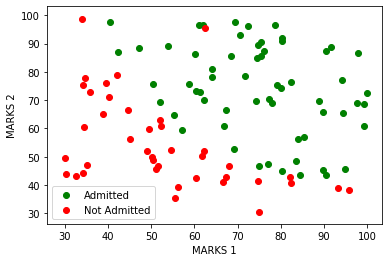

In [243]:
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],label='Admitted',color='green')
plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:,1],label='Not Admitted',color='red')
plt.legend()
plt.xlabel("MARKS 1")
plt.ylabel("MARKS 2")
plt.show()

###### PREPROCESSING THE DATA FOR REGRESSION

In [244]:
x=marks_df.iloc[:,:-1]
y=marks_df.iloc[:,-1]
x = np.c_[np.ones((x.shape[0], 1)), x]
print("SHAPE Y:",y.shape)
# print(y)
#Converting Series into Matrix
y = y[:, np.newaxis]
print("SHAPE Y:",y.shape)
# print(y)
theta = np.zeros((x.shape[1], 1))

SHAPE Y: (100,)
SHAPE Y: (100, 1)


###### METHODS

In [245]:
#SIGMOID transforms Output to the Applicable Range
def sigmoid(x):
    return 1/(1+np.exp(-x))

#MATRIX MULTIPLICATION 
#Return Matrix of m x 1
def net_input(theta, x):
    return np.dot(x, theta)

#FINDS PROB.(By Passing Through Sigmoid Function) AFTER MULTIPLICATION 
def probability(theta, x):
    return sigmoid(net_input(theta, x))

#TOTAL COST
def cost_function(theta,x,y):
    m=x.shape[0]
    total_cost=-(1/m)* np.sum(y * np.log(probability(theta,x)) + (1-y) * np.log(1-probability(theta,x)))
    return total_cost

#GRADIENT RETURN DERIVATIVE OF COST FUNCTION
def gradient(theta,x,y):
    m=x.shape[0]
    return (1/m) * np.dot(x.T, sigmoid(net_input(theta,x))- y)

def predict(x,parameters):
    theta=parameters[:,np.newaxis]
    return probability(theta,x)

def accuracy(x,actual_class,paramters,threshold=0.5):
    predicted_class=(predict(x,parameters)>=threshold)
    predicted_class=(predicted_class).astype(int)
    predicted_class=(predicted_class).flatten()
    return (np.mean(predicted_class==actual_class))*100

In [246]:
from scipy.optimize import fmin_tnc
def fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta,fprime=gradient,args=(x, y.flatten()))
    print(opt_weights)
    return opt_weights[0]
parameters = fit(x, y, theta)
print(parameters.shape)

(array([-19.2202795 ,   0.15736179,   0.15359046]), 34, 1)
(3,)


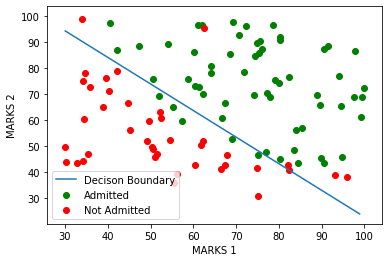

ACCURACY= 90.0 %
PREDICT RESULT= [[ True]]


In [247]:
x1=np.min(x[:,1])
x2=np.max(x[:,2])
def y_finder(x,parameter):
    return -((parameter[0]+parameter[1]*x)/parameter[2])
y1=y_finder(x1,parameters)
y2=y_finder(x2,parameters)
plt.plot([x1,x2],[y1,y2],label="Decison Boundary")
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],label='Admitted',color='green')
plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:,1],label='Not Admitted',color='red')
plt.xlabel("MARKS 1")
plt.ylabel("MARKS 2")
plt.legend()
plt.show()
print("ACCURACY=",accuracy(x,y.flatten(),parameters),'%')
print("PREDICT RESULT=",predict([[1,60,65]],parameters)>0.5)

###### USING SCIKIT LEARN

In [268]:
x=marks_df.iloc[:,:-1]
y=marks_df.iloc[:,-1]
x = np.c_[np.ones((x.shape[0], 1)), x]
y=y[:,np.newaxis]
print(y.shape)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
lr.fit(x,y.flatten())
predicted_class=lr.predict(x)
accuracy=accuracy_score(y.flatten(),predicted_class)
parameters=lr.coef_
print("Parameters=",parameters)
print("Accuracy=",accuracy*100,'%')
# print("PREDICT CASE 1=",lr.predict([[1,60,60]]).astype(bool))
print(parameters.shape)

(100, 1)
Parameters= [[-2.76072022  0.04986011  0.04414039]]
Accuracy= 91.0 %
(1, 3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [269]:
lr.intercept_,lr.coef_

(array([-2.76072022]), array([[-2.76072022,  0.04986011,  0.04414039]]))

In [266]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,predicted_class)

array([[27, 13],
       [ 0, 60]], dtype=int64)

###### GRAPH

PARAMETERS= [-3.7923511542409267, 0.03679532833116775, 0.030688069088878583]


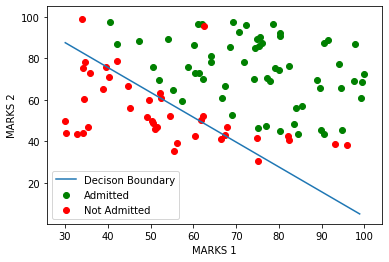

(30.05882245, 87.53652454198985)

In [267]:
# parameters=parameters.flatten()
parameters=[lr.intercept_[0],lr.coef_[0][0],lr.coef_[0][1]]
print("PARAMETERS=",parameters)
x1=np.min(x.iloc[:,0])
x2=np.max(x.iloc[:,1])
def y_finder(x,parameter):
    return -((parameter[0]+parameter[1]*x)/parameter[2])
y1=y_finder(x1,parameters)
y2=y_finder(x2,parameters)
plt.plot([x1,x2],[y1,y2],label="Decison Boundary")
plt.scatter(admitted.iloc[:,0],admitted.iloc[:,1],label='Admitted',color='green')
plt.scatter(not_admitted.iloc[:,0],not_admitted.iloc[:,1],label='Not Admitted',color='red')
plt.xlabel("MARKS 1")
plt.ylabel("MARKS 2")
plt.legend()
plt.show()
x1,y1